# Exploratory Data Analysis, RIT Business Competition

## Data cleaning

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

### Shops data

In [2]:
df_info = pd.read_csv(r'C:\Users\Fardin\Desktop\Projects\rit_competition\pharm_info.csv')

In [3]:
df_info.head()

,storenum,storename,telephone,address1,address2,city,state,zipcode,zipcode4,longitude,latitude,website,orgname
0,2850.0,CVS - 1142,585-671-5665,1900 EMPIRE BOULEVARD,NaN,WEBSTER,NY,14580,1934.0,-77.501365,43.191229,HTTP://WWW.CVS.COM,CVS ALBANY LLC
1,2849.0,CVS - 2067,585-321-2581,2580 EAST HENRIETTA ROAD,NaN,ROCHESTER,NY,14623,4526.0,-77.606816,43.069235,HTTP://WWW.CVS.COM,CVS ALBANY LLC
2,2852.0,CVS - 2217,585-723-3051,878 LONG POND ROAD,NaN,GREECE,NY,14612,3049.0,-77.695905,43.238923,HTTP://WWW.CVS.COM,CVS ALBANY LLC
3,4603.0,CVS - 2218,585-581-5101,3750 MOUNT READ BOULEVARD,NaN,ROCHESTER,NY,14616,3436.0,-77.658331,43.227241,HTTP://WWW.CVS.COM,CVS ALBANY LLC
4,6057.0,CVS - 2501,585-426-2991,2709 CHILI AVENUE,NaN,ROCHESTER,NY,14624,4123.0,-77.709106,43.122328,HTTP://WWW.CVS.COM,CVS ALBANY LLC


In [4]:
#Dropping stores with no store numbers

df_info = df_info.dropna(subset=['storenum'])

In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   storenum   69 non-null     float64
 1   storename  69 non-null     object 
 2   telephone  69 non-null     object 
 3   address1   69 non-null     object 
 4   address2   2 non-null      object 
 5   city       69 non-null     object 
 6   state      69 non-null     object 
 7   zipcode    69 non-null     int64  
 8   zipcode4   69 non-null     float64
 9   longitude  69 non-null     float64
 10  latitude   69 non-null     float64
 11  website    69 non-null     object 
 12  orgname    69 non-null     object 
dtypes: float64(4), int64(1), object(8)
memory usage: 7.5+ KB


In [6]:
#Dropping columns that I don't think will be useful for data analysis

df_info = df_info.drop(['telephone','address1','address2','state','website','zipcode4'],axis = 1)

In [7]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   storenum   69 non-null     float64
 1   storename  69 non-null     object 
 2   city       69 non-null     object 
 3   zipcode    69 non-null     int64  
 4   longitude  69 non-null     float64
 5   latitude   69 non-null     float64
 6   orgname    69 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.3+ KB


### Sales data

In [8]:
df_sales = pd.read_csv(r'C:\Users\Fardin\Desktop\Projects\rit_competition\pharm_sales.csv')

In [9]:
df_sales.head()

,invnum,date,storenum,vendornum,itemnum,itemcategory,productcost,product_retail_price,units_sold,sales_num
0,INV-31573500023,11/2/2020,3696,259.0,11777,Food and beverages,6.63,9.95,12,120.59
1,INV-20889900001,7/29/2019,2528,260.0,10803,Diet and nutrition items,7.35,11.03,6,74.12
2,INV-20842300030,7/25/2019,5501,260.0,11294,Skin care items,8.00,12.00,4,61.44
3,INV-28440700003,7/2/2020,5057,434.0,36301,Seasonal products,4.13,6.20,3,21.39
4,INV-28440700012,7/2/2020,5057,259.0,11774,Skin care items,3.07,4.61,8,36.51


In [10]:
#Changing date column to datetime object
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990746 entries, 0 to 990745
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invnum                990746 non-null  object        
 1   date                  990746 non-null  datetime64[ns]
 2   storenum              990746 non-null  int64         
 3   vendornum             990745 non-null  float64       
 4   itemnum               990746 non-null  int64         
 5   itemcategory          990746 non-null  object        
 6   productcost           990746 non-null  float64       
 7   product_retail_price  990746 non-null  float64       
 8   units_sold            990746 non-null  int64         
 9   sales_num             990745 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 75.6+ MB


### Merging the two dataframes

In [11]:
#Merging both of them using the storenumber field as that is unique for stores.

df_merged = pd.merge(df_sales, df_info, on='storenum', how='outer')

In [12]:
df_merged.tail(50)

,invnum,date,storenum,vendornum,itemnum,itemcategory,productcost,product_retail_price,units_sold,sales_num,storename,city,zipcode,longitude,latitude,orgname
990696,INV-32827900032,2020-12-18,6064,115.0,35435,OTC/VMS,8.25,12.38,6,86.91,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990697,INV-32827900061,2020-12-18,6064,260.0,5290,OTC/VMS,12.25,18.38,3,68.37,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990698,INV-33707500008,2021-01-22,6064,154.0,27629,OTC/VMS,9.09,13.64,12,216.06,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990699,INV-33707500003,2021-01-22,6064,421.0,64858,Seasonal products,25.80,38.70,2,87.46,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990700,INV-33707500013,2021-01-22,6064,259.0,43024,Skin care items,2.99,4.49,24,117.46,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990701,INV-33707500006,2021-01-22,6064,421.0,64864,Skin care items,5.33,8.00,24,199.68,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990702,INV-33707500002,2021-01-22,6064,259.0,11786,OTC/VMS,5.23,7.85,12,94.20,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990703,INV-33707500009,2021-01-22,6064,301.0,38178,Personal hygiene,19.00,28.50,6,212.04,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990704,INV-33707500005,2021-01-22,6064,421.0,64904,Personal hygiene,15.33,23.00,6,191.82,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC
990705,INV-33707500001,2021-01-22,6064,259.0,11788,Personal hygiene,10.45,15.68,6,115.72,RITE AID - 621,ROCHESTER,14609,-77.578954,43.168956,RITE AID OF NEW YORK INC


#### Renaming columns

In [13]:
df_merged = df_merged.rename(columns = {'sales_num':'revenue_original'})

In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990746 entries, 0 to 990745
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invnum                990746 non-null  object        
 1   date                  990746 non-null  datetime64[ns]
 2   storenum              990746 non-null  int64         
 3   vendornum             990745 non-null  float64       
 4   itemnum               990746 non-null  int64         
 5   itemcategory          990746 non-null  object        
 6   productcost           990746 non-null  float64       
 7   product_retail_price  990746 non-null  float64       
 8   units_sold            990746 non-null  int64         
 9   revenue_original      990745 non-null  float64       
 10  storename             990746 non-null  object        
 11  city                  990746 non-null  object        
 12  zipcode               990746 non-null  int64         
 13 

In [15]:
# Dropping nulls
df_merged = df_merged.dropna()

df_merged = df_merged.reset_index(drop=True)

### Adding new fields

In [16]:
# Total cost per sale.

df_merged['total_cost'] = df_merged['productcost'] * df_merged['units_sold']

# Profit per sale

df_merged['profit'] = df_merged['revenue_original'] - df_merged['total_cost']

# Margin per unit

df_merged['margin'] = df_merged['product_retail_price'] - df_merged['productcost']

df_merged.head()

,invnum,date,storenum,vendornum,itemnum,itemcategory,productcost,product_retail_price,units_sold,revenue_original,storename,city,zipcode,longitude,latitude,orgname,total_cost,profit,margin
0,INV-31573500023,2020-11-02,3696,259.0,11777,Food and beverages,6.63,9.95,12,120.59,WAL-MART - 1610,GREECE,14626,-77.724197,43.214602,WAL-MART STORES EAST LP,79.56,41.03,3.32
1,INV-20309800006,2019-07-01,3696,260.0,25608,Personal hygiene,12.96,19.44,6,118.97,WAL-MART - 1610,GREECE,14626,-77.724197,43.214602,WAL-MART STORES EAST LP,77.76,41.21,6.48
2,INV-20890000006,2019-07-29,3696,297.0,35916,OTC/VMS,3.37,5.06,12,62.54,WAL-MART - 1610,GREECE,14626,-77.724197,43.214602,WAL-MART STORES EAST LP,40.44,22.10,1.69
3,INV-20462900015,2019-07-08,3696,260.0,43334,Skin care items,5.00,7.50,24,167.40,WAL-MART - 1610,GREECE,14626,-77.724197,43.214602,WAL-MART STORES EAST LP,120.00,47.40,2.50
4,INV-20890000018,2019-07-29,3696,370.0,64009,OTC/VMS,11.49,17.24,6,124.13,WAL-MART - 1610,GREECE,14626,-77.724197,43.214602,WAL-MART STORES EAST LP,68.94,55.19,5.75


In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990744 entries, 0 to 990743
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invnum                990744 non-null  object        
 1   date                  990744 non-null  datetime64[ns]
 2   storenum              990744 non-null  int64         
 3   vendornum             990744 non-null  float64       
 4   itemnum               990744 non-null  int64         
 5   itemcategory          990744 non-null  object        
 6   productcost           990744 non-null  float64       
 7   product_retail_price  990744 non-null  float64       
 8   units_sold            990744 non-null  int64         
 9   revenue_original      990744 non-null  float64       
 10  storename             990744 non-null  object        
 11  city                  990744 non-null  object        
 12  zipcode               990744 non-null  int64         
 13 

# EDA

### Where are the pharmacies?

In [18]:
from matplotlib import pyplot as plt
import numpy as np

In [19]:
BBox = (df_info.longitude.min(),   df_info.longitude.max(),      
         df_info.latitude.min(), df_info.latitude.max())

In [20]:
BBox

(-77.806208, -77.439842, 42.949811, 43.250817)

In [21]:
ruh_m = plt.imread('geo_rochester.png')

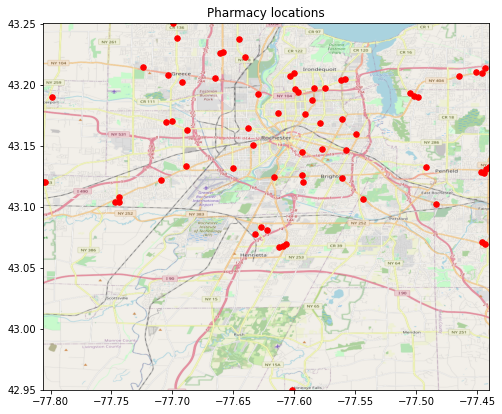

In [22]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_info.longitude, df_info.latitude, zorder=1, alpha= 1, c='red', s=30)
ax.set_title('Pharmacy locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Naive  EDA - Cities

#### Which city made the most sales?

In [23]:
df_merged.groupby(['city'])['units_sold'].sum().sort_values()

city
EAST ROCHESTER        6214
HENRIETTA            18319
HONEOYE FALLS        53312
SPENCERPORT          83386
GREECE              162429
FAIRPORT            173189
NORTH CHILI         196724
IRONDEQUOIT         292476
PENFIELD            430325
WEBSTER            1218467
ROCHESTER         12685461
Name: units_sold, dtype: int64

#### Which city made the most revenue?

In [24]:
#Gives total revenue per city.
total_revenue_city_groups = df_merged.groupby(['city']).sum().sort_values(['revenue_original'], ascending = True)['revenue_original']

total_revenue_city_groups

city
EAST ROCHESTER    5.294507e+04
HENRIETTA         3.308428e+05
HONEOYE FALLS     3.732388e+05
SPENCERPORT       4.463536e+05
NORTH CHILI       1.768509e+06
FAIRPORT          2.426044e+06
GREECE            2.573202e+06
PENFIELD          3.648242e+06
IRONDEQUOIT       4.261234e+06
WEBSTER           1.676187e+07
ROCHESTER         1.986792e+08
Name: revenue_original, dtype: float64

<AxesSubplot:title={'center':'Revenue per city'}, xlabel='city', ylabel='Total ($) '>

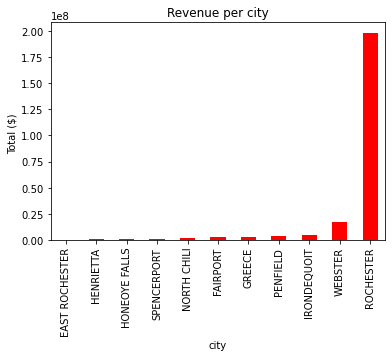

In [72]:
total_revenue_city_groups.plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Revenue per city'
                              )

#### Which city made the most revenue, per store?

In [26]:
# Gives number of stores per city.

number_stores_city = df_info.groupby(['city']).count()['storenum']

number_stores_city

city
EAST ROCHESTER     1
FAIRPORT           3
GREECE             2
HENRIETTA          1
HONEOYE FALLS      1
IRONDEQUOIT        2
NORTH CHILI        2
PENFIELD           3
ROCHESTER         46
SPENCERPORT        1
WEBSTER            7
Name: storenum, dtype: int64

In [27]:
# Diviging total profit per city by number of stores in that city

revenue_per_city = total_revenue_city_groups/number_stores_city
revenue_per_city

city
EAST ROCHESTER    5.294507e+04
FAIRPORT          8.086814e+05
GREECE            1.286601e+06
HENRIETTA         3.308428e+05
HONEOYE FALLS     3.732388e+05
IRONDEQUOIT       2.130617e+06
NORTH CHILI       8.842546e+05
PENFIELD          1.216081e+06
ROCHESTER         4.319113e+06
SPENCERPORT       4.463536e+05
WEBSTER           2.394552e+06
dtype: float64

<AxesSubplot:title={'center':'Average Revenue / City'}, xlabel='city', ylabel='Total ($) '>

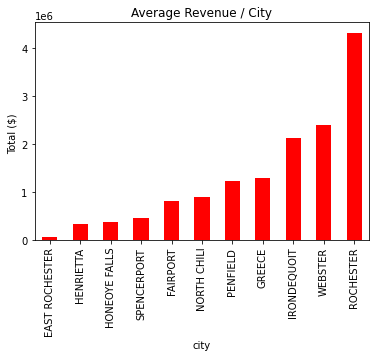

In [55]:
#Plotting average revenue/city

revenue_per_city.sort_values().plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Average Revenue / City')

#### Which city made the most profit?

In [29]:
total_profit_city_groups = df_merged.groupby(['city']).sum().sort_values(['profit'], ascending = True)['profit']

total_profit_city_groups.sort_values()

city
EAST ROCHESTER       23819.74
HENRIETTA           147168.46
HONEOYE FALLS       165284.03
SPENCERPORT         198562.52
NORTH CHILI         786878.96
GREECE              993381.01
FAIRPORT           1421191.68
PENFIELD           1625154.27
IRONDEQUOIT        2203673.95
WEBSTER            7688075.55
ROCHESTER         88136969.28
Name: profit, dtype: float64

<AxesSubplot:title={'center':'Profit per city'}, xlabel='city', ylabel='Total ($) '>

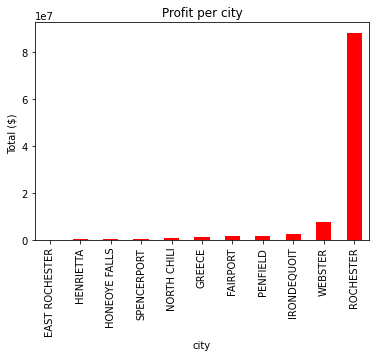

In [30]:
total_profit_city_groups.plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Profit per city')

#### Which city made the most average profit?

In [31]:
profit_per_city = total_profit_city_groups/number_stores_city
profit_per_city.sort_values()

city
EAST ROCHESTER    2.381974e+04
HENRIETTA         1.471685e+05
HONEOYE FALLS     1.652840e+05
SPENCERPORT       1.985625e+05
NORTH CHILI       3.934395e+05
FAIRPORT          4.737306e+05
GREECE            4.966905e+05
PENFIELD          5.417181e+05
WEBSTER           1.098297e+06
IRONDEQUOIT       1.101837e+06
ROCHESTER         1.916021e+06
dtype: float64

<AxesSubplot:title={'center':'Average Profit/ City'}, xlabel='city', ylabel='Total ($) '>

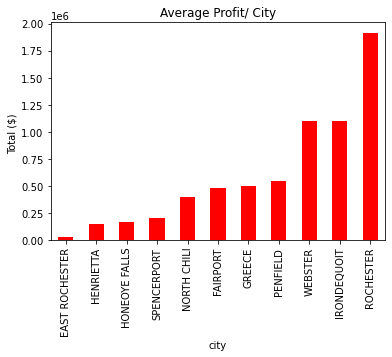

In [54]:
profit_per_city.sort_values().plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Average Profit/ City')

### Naive  EDA - Products

#### Which products were sold the most?

In [33]:
_sold_products = df_merged.groupby(['itemnum'])['units_sold'].sum().sort_values()

_sold_products

itemnum
87471          1
916908         1
967346         1
902021         1
916809         1
           ...  
36903     229625
37347     259822
43337     286507
89387     312512
64870     669129
Name: units_sold, Length: 5537, dtype: int64

#### Which products made the most revenue?

In [34]:
_revenue_products = df_merged.groupby(['itemnum'])['revenue_original'].sum().sort_values()

_revenue_products

itemnum
89589           6.19
992001          8.41
68800          10.15
100794         10.65
39669          10.66
             ...    
88296     4281085.31
38177     4435254.48
26827     5065575.17
11297     5338010.07
43337     5932849.25
Name: revenue_original, Length: 5537, dtype: float64

#### Which products made the most profit?

In [35]:
_profit_products = df_merged.groupby(['itemnum'])['profit'].sum().sort_values()

_profit_products

itemnum
992001      -5029.91
101181      -3728.53
12865       -1703.22
37095        -960.23
24890        -923.19
             ...    
88296     1886689.55
38177     2002026.87
26827     2226859.60
11297     2382710.09
43337     2585506.00
Name: profit, Length: 5537, dtype: float64

#### Possible product stack

In [36]:
# Initializing top 500 products.

top_sold = set(_sold_products.tail(500).index)
top_revenue = set(_revenue_products.tail(500).index)
top_profit = set(_profit_products.tail(500).index)

In [37]:
#Finding intersections to see which to prioritize

sold_revenue_intersection = top_sold & top_revenue

sold_profit_intersection = top_sold & top_profit

revenue_profit_intersection = top_revenue & top_profit

all_intersection = top_revenue & top_profit & top_sold

#### Most popular product category

<AxesSubplot:title={'center':'Most popular product category'}, xlabel='itemcategory'>

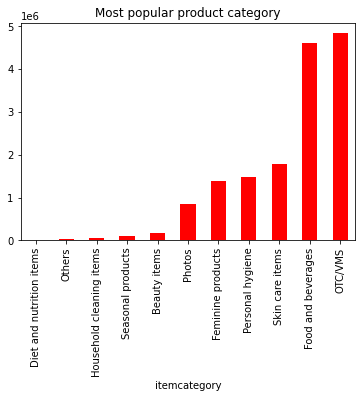

In [53]:
df_merged.groupby(['itemcategory']).sum().sort_values('units_sold')\
['units_sold'].plot(kind = 'bar', color = 'red', title = 'Most popular product category')

### Naive  EDA  - Time

#### When did the most sales occur?

<AxesSubplot:title={'center':'Totale sales over time'}, xlabel='date'>

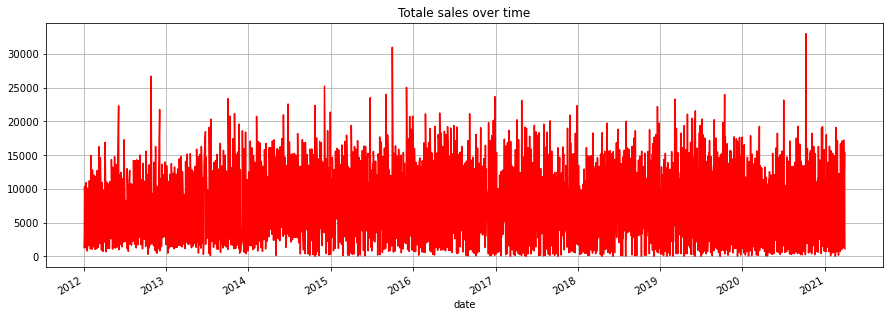

In [52]:
#Seems to me there is nothing of note here.

df_merged.groupby(['date']).sum().sort_values(by = 'date')\
['units_sold'].plot(figsize = (15,5), color = 'red', grid = True,
                   title = 'Totale sales over time')

### Naive  EDA  - Zipcode

#### Most profitible zipcode

In [47]:
total_profit_zipcode_groups = df_merged.groupby(['zipcode']).sum().sort_values(['profit'], ascending = True)['profit']

total_profit_zipcode_groups.sort_values().head(10)

zipcode
14445     23819.74
14611     97036.78
14610    110241.02
14467    147168.46
14472    165284.03
14625    181099.08
14559    198562.52
14609    214917.73
14619    264752.10
14612    307257.82
Name: profit, dtype: float64

<AxesSubplot:title={'center':'Profit per zipcode'}, xlabel='zipcode', ylabel='Total ($) '>

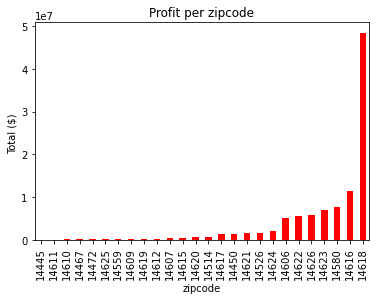

In [51]:
total_profit_zipcode_groups.plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Profit per zipcode')

#### Average profit per zipcode

In [46]:
number_stores_zipcode = df_info.groupby(['zipcode']).count()['storenum']

number_stores_zipcode.head(10)

zipcode
14445    1
14450    3
14467    1
14472    1
14514    2
14526    3
14559    1
14580    7
14606    4
14607    2
Name: storenum, dtype: int64

In [49]:
profit_per_zipcode = total_profit_zipcode_groups/number_stores_zipcode
profit_per_zipcode.sort_values().tail(10)

zipcode
14450    4.737306e+05
14526    5.417181e+05
14617    7.012704e+05
14580    1.098297e+06
14606    1.264831e+06
14623    1.396503e+06
14622    1.844672e+06
14626    1.980266e+06
14616    2.888253e+06
14618    1.615876e+07
dtype: float64

<AxesSubplot:title={'center':'Average Profit/ Zipcode'}, xlabel='zipcode', ylabel='Total ($) '>

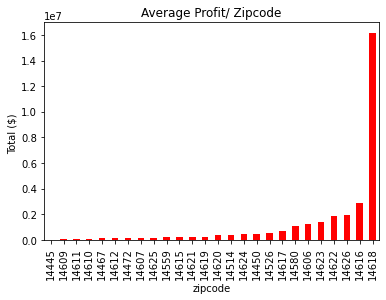

In [50]:
profit_per_zipcode.sort_values().plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Average Profit/ Zipcode')

### Naive  EDA  -  Stores

#### Most profitible stores

In [61]:
total_profit_store_groups = df_merged.groupby(['storename']).sum().sort_values(['profit'], ascending = True)['profit']

total_profit_store_groups.sort_values().head()

storename
CVS - 653          7083.03
RITE AID - 621     8819.08
CVS - 831         24445.47
RITE AID - 623    34914.47
RITE AID - 629    51987.58
Name: profit, dtype: float64

<AxesSubplot:title={'center':'Profit / Store'}, xlabel='storename', ylabel='Total ($) '>

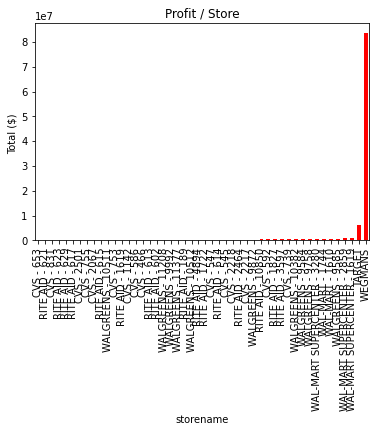

In [59]:
total_profit_store_groups.sort_values().plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Profit / Store')

#### Average profit per store

In [68]:
number_stores = df_info.groupby(['storename']).count()['storenum']

number_stores.sort_values().tail(10)

storename
CVS - 831            1
RITE AID - 10850     1
RITE AID - 1619      1
RITE AID - 1722      1
RITE AID - 1827      1
RITE AID - 189       1
RITE AID - 2464      1
RITE AID - 4894      1
TARGET               6
WEGMANS             17
Name: storenum, dtype: int64

In [69]:
profit_per_store = total_profit_store_groups/number_stores
profit_per_store.sort_values().tail(10)

storename
WALGREENS - 9584               4.653579e+05
WALGREENS - 9758               5.204847e+05
WAL-MART SUPERCENTER - 3280    5.962654e+05
WAL-MART - 1744                6.676577e+05
WAL-MART - 1610                6.989474e+05
WALGREENS - 9585               7.623609e+05
WAL-MART SUPERCENTER - 2859    1.002671e+06
TARGET                         1.045015e+06
WAL-MART SUPERCENTER - 1619    1.153745e+06
WEGMANS                        4.912098e+06
dtype: float64

<AxesSubplot:title={'center':'Average profit / Store'}, xlabel='storename', ylabel='Total ($) '>

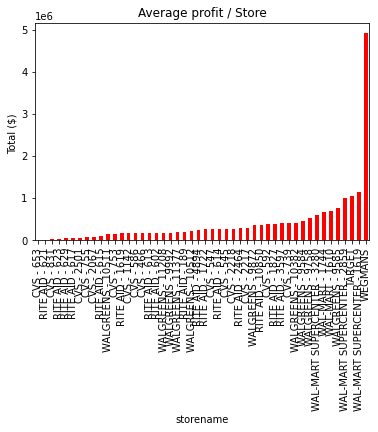

In [70]:
profit_per_store.sort_values().plot(kind = 'bar',
                             color = 'red',
                            ylabel = 'Total ($) ',
                            title = 'Average profit / Store')